In [220]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [221]:
df = pd.read_csv("data_1.csv")

In [222]:
df.head()

,Age_Group,Income_Level,City,Occupation,Tech_Adoption,Vehicle_Usage,Willingness_to_Pay,Expected_Price_Range
0,26-35,Low,Hyderabad,Doctor,Average User,Occasional Travel,Medium,20L-30L
1,60+,Middle,Kolkata,Driver,Late Adopter,Long Trips,Medium,<10L
2,46-60,High,Bangalore,Driver,Average User,Long Trips,High,30L+
3,36-45,Middle,Kolkata,Driver,Average User,Daily Commute,Medium,20L-30L
4,26-35,High,Hyderabad,Business Owner,Average User,Daily Commute,High,<10L


In [223]:
# Preprocesing
# Handling Missing Values
print("Missing Values Before Handling:\n", df.isnull().sum())


Missing Values Before Handling:
 Age_Group               0
Income_Level            0
City                    0
Occupation              0
Tech_Adoption           0
Vehicle_Usage           0
Willingness_to_Pay      0
Expected_Price_Range    0
dtype: int64


In [224]:
#identifying categorical and numerical columns
num_cols = df.select_dtypes(include = ["int64", "float64"]).columns
cat_cols = df.select_dtypes(include = ["object"]).columns

In [225]:
cat_cols

Index(['Age_Group', 'Income_Level', 'City', 'Occupation', 'Tech_Adoption',
       'Vehicle_Usage', 'Willingness_to_Pay', 'Expected_Price_Range'],
      dtype='object')

In [226]:
# increasing granularity
age_mapping = {"18-25": (18, 25), "26-35": (26, 35), "36-45": (36, 45), "46-60": (46, 60), "60+": (61, 80)}
df["Age_Numeric"] = df["Age_Group"].apply(lambda x: np.random.randint(age_mapping[x][0], age_mapping[x][1]+1))

income_mapping = {"Low": (10000, 30000), "Middle": (31000, 70000), "High": (71000, 150000)}
df["Income_Numeric"] = df["Income_Level"].apply(lambda x: np.random.randint(income_mapping[x][0], income_mapping[x][1]+1))


df.head()

,Age_Group,Income_Level,City,Occupation,Tech_Adoption,Vehicle_Usage,Willingness_to_Pay,Expected_Price_Range,Age_Numeric,Income_Numeric
0,26-35,Low,Hyderabad,Doctor,Average User,Occasional Travel,Medium,20L-30L,34,20361
1,60+,Middle,Kolkata,Driver,Late Adopter,Long Trips,Medium,<10L,79,60673
2,46-60,High,Bangalore,Driver,Average User,Long Trips,High,30L+,52,139142
3,36-45,Middle,Kolkata,Driver,Average User,Daily Commute,Medium,20L-30L,40,62242
4,26-35,High,Hyderabad,Business Owner,Average User,Daily Commute,High,<10L,28,84001


In [227]:
# standard scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Apply scaling to Age_Numeric and Income_Numeric
df_scaled = scaler.fit_transform(df[["Age_Numeric", "Income_Numeric"]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

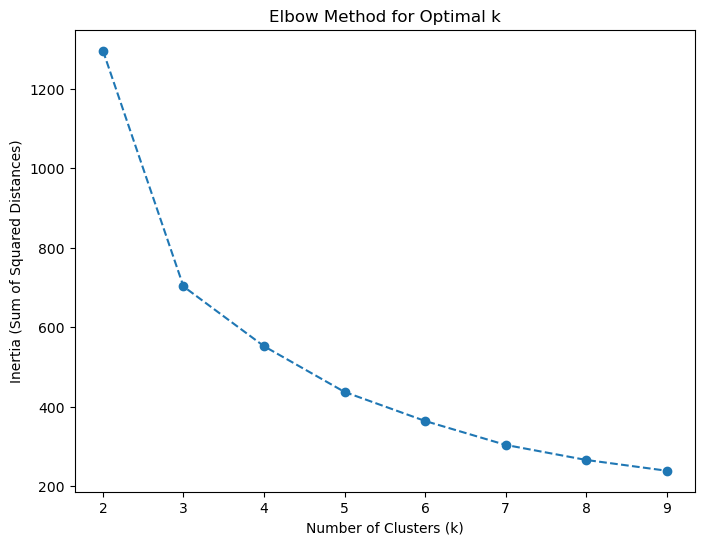

In [228]:
# Elbow Method
inertia = []  # List to store inertia values
K_range = range(2, 10)  # Testing k from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)  # Store inertia for each k

# Plot the Elbow Graph
plt.figure(figsize=(8, 6))
plt.plot(K_range, inertia, marker="o", linestyle="--")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.title("Elbow Method for Optimal k")
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


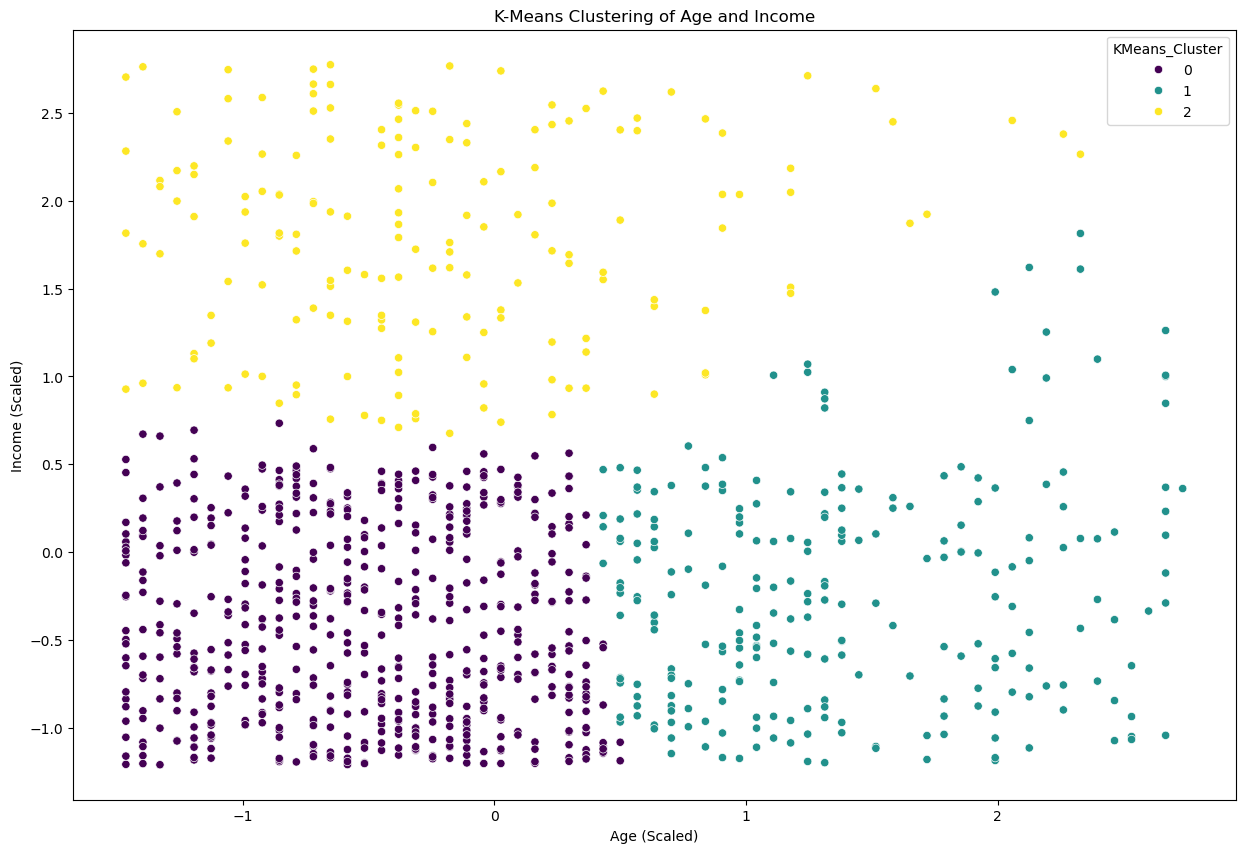

In [229]:
# K-Means Clustering 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["KMeans_Cluster"] = kmeans.fit_predict(df_scaled)

# Scatter plot of clusters
plt.figure(figsize=(15,10))
sns.scatterplot(x=df_scaled[:, 0], y=df_scaled[:, 1], hue=df["KMeans_Cluster"], palette="viridis")
plt.xlabel("Age (Scaled)")
plt.ylabel("Income (Scaled)")
plt.title("K-Means Clustering of Age and Income")
plt.show()


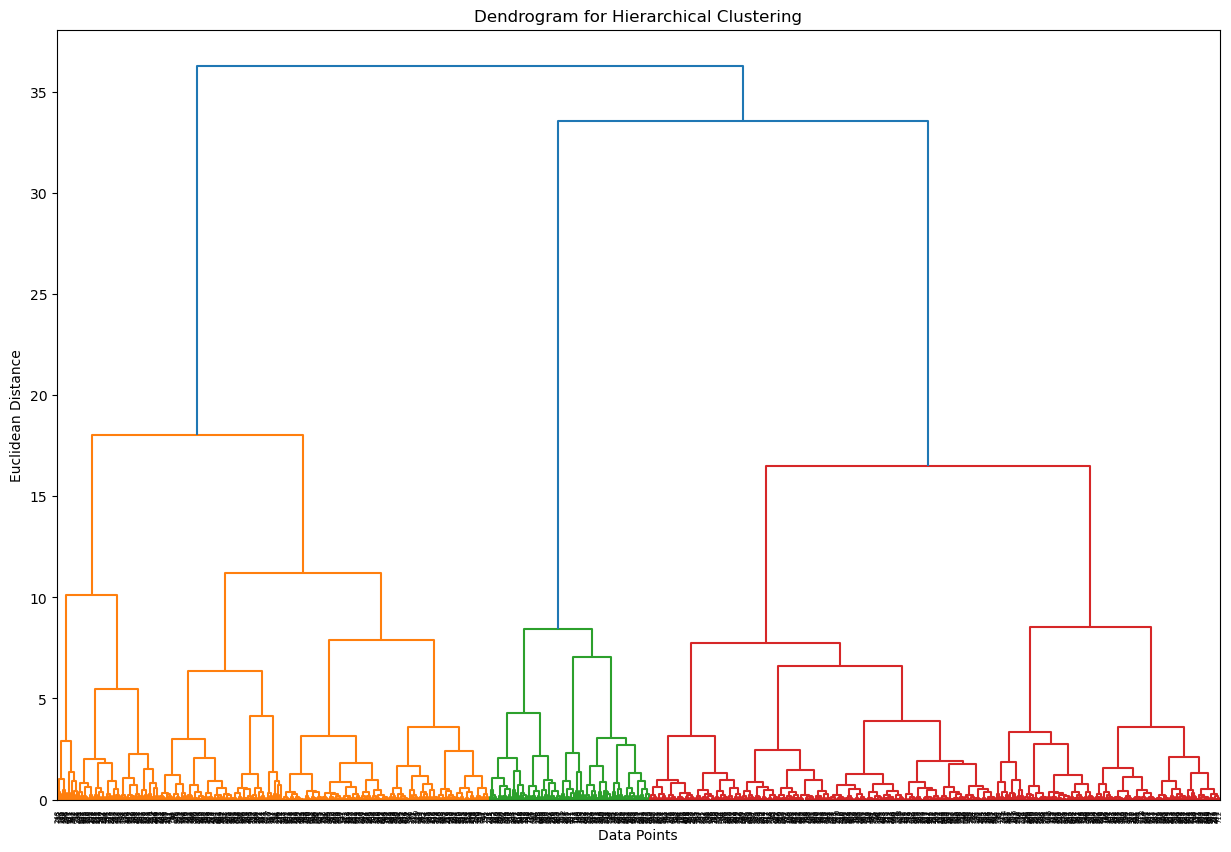

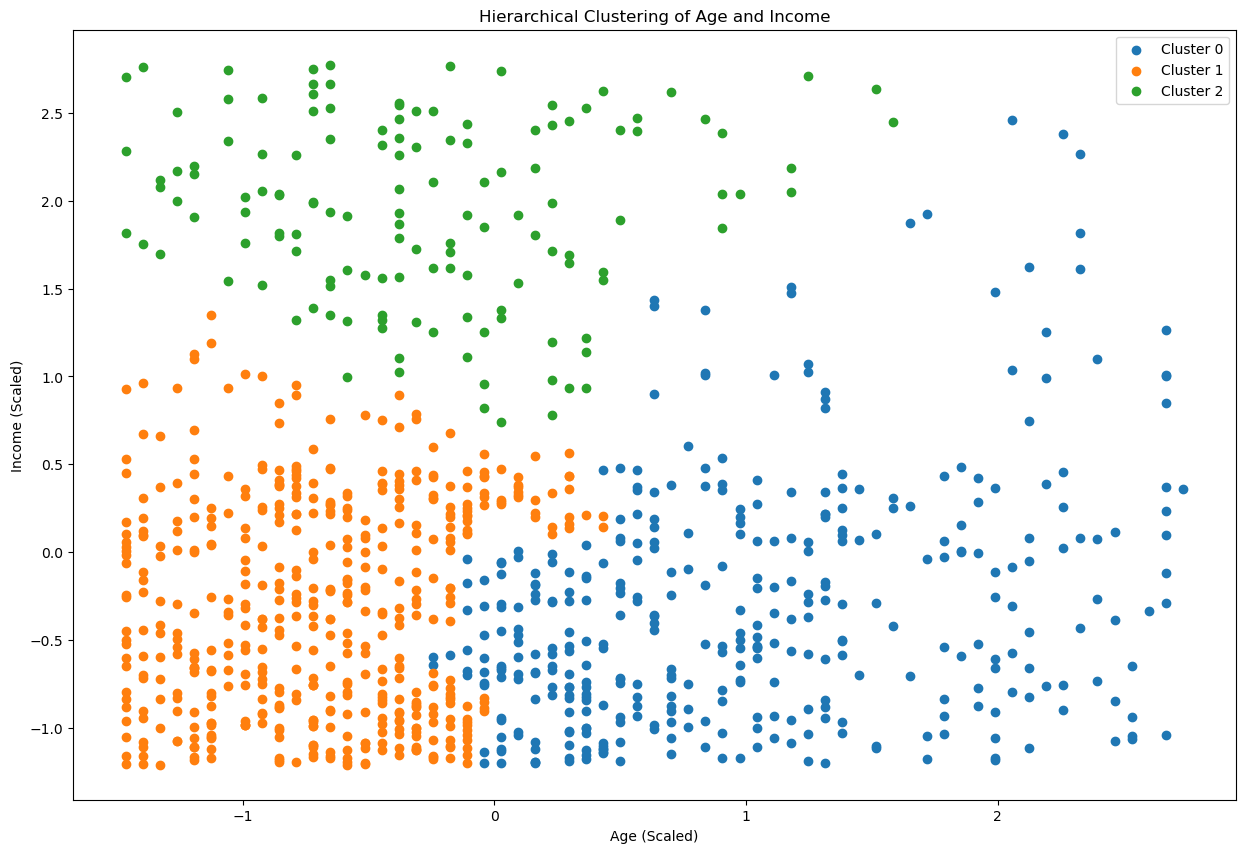

In [230]:
# Hiearchical Clustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

X_hc = df_scaled

plt.figure(figsize=(15, 10))
dendrogram = sch.dendrogram(sch.linkage(X_hc, method='ward'))
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

optimal_clusters = 3 
hc = AgglomerativeClustering(n_clusters=optimal_clusters, linkage='ward',metric='euclidean')
df['HC_Cluster'] = hc.fit_predict(X_hc)

#  Visualizing the Clusters
plt.figure(figsize=(15, 10))
for cluster in range(optimal_clusters):
    plt.scatter(X_hc[df['HC_Cluster'] == cluster, 0], X_hc[df['HC_Cluster'] == cluster, 1], label=f"Cluster {cluster}")

plt.title("Hierarchical Clustering of Age and Income")
plt.xlabel("Age (Scaled)")
plt.ylabel("Income (Scaled)")
plt.legend()
plt.show()

Clusters Found: [-1  0  1]


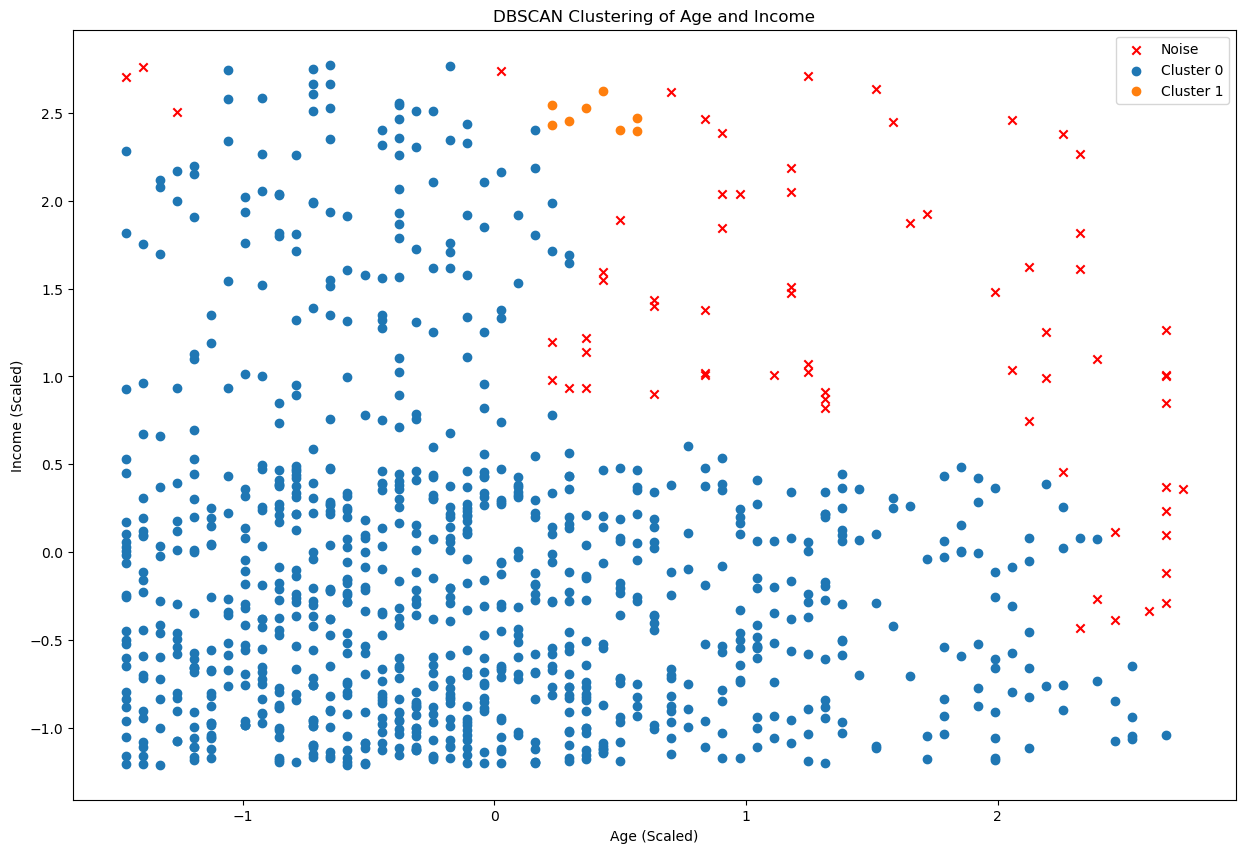

In [231]:
# DBSCAN
from sklearn.cluster import DBSCAN

X_dbscan = df_scaled
dbscan = DBSCAN(eps=0.3, min_samples=10)  # Adjust 'eps' based on data density
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_dbscan)

unique_clusters = np.unique(df['DBSCAN_Cluster'])
print("Clusters Found:", unique_clusters)

#  Plot the Clusters
plt.figure(figsize=(15, 10))
for cluster in unique_clusters:
    if cluster == -1:
        plt.scatter(X_dbscan[df['DBSCAN_Cluster'] == cluster, 0], X_dbscan[df['DBSCAN_Cluster'] == cluster, 1], 
                    color='red', label="Noise", marker="x")  # Mark noise
    else:
        plt.scatter(X_dbscan[df['DBSCAN_Cluster'] == cluster, 0], X_dbscan[df['DBSCAN_Cluster'] == cluster, 1], 
                    label=f"Cluster {cluster}")

plt.title("DBSCAN Clustering of Age and Income")
plt.xlabel("Age (Scaled)")
plt.ylabel("Income (Scaled)")
plt.legend()
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_18956\3298077563.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["KMeans_Cluster"], palette="viridis")


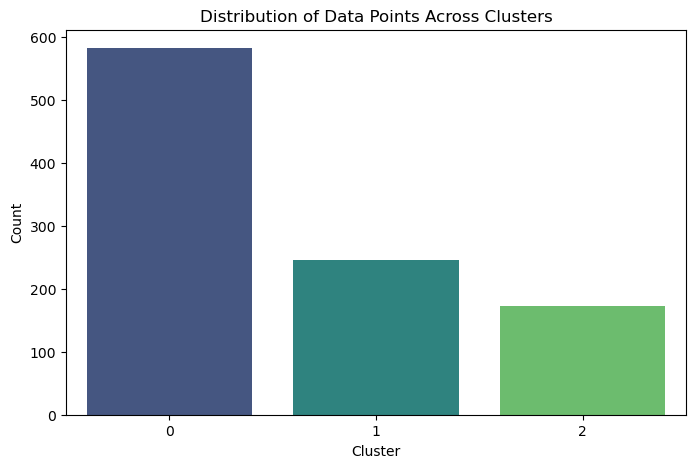

In [232]:
# bar plots

plt.figure(figsize=(8, 5))
sns.countplot(x=df["KMeans_Cluster"], palette="viridis")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.title("Distribution of Data Points Across Clusters")
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_18956\4232719591.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["HC_Cluster"], palette="viridis")


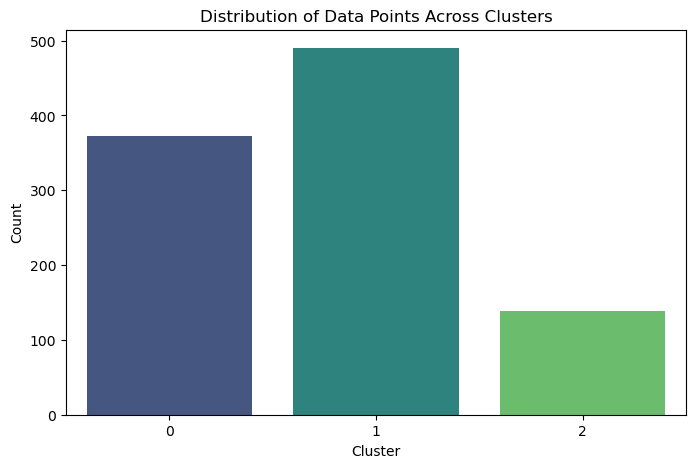

In [233]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df["HC_Cluster"], palette="viridis")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.title("Distribution of Data Points Across Clusters")
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_18956\1460290020.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["DBSCAN_Cluster"], palette="viridis")


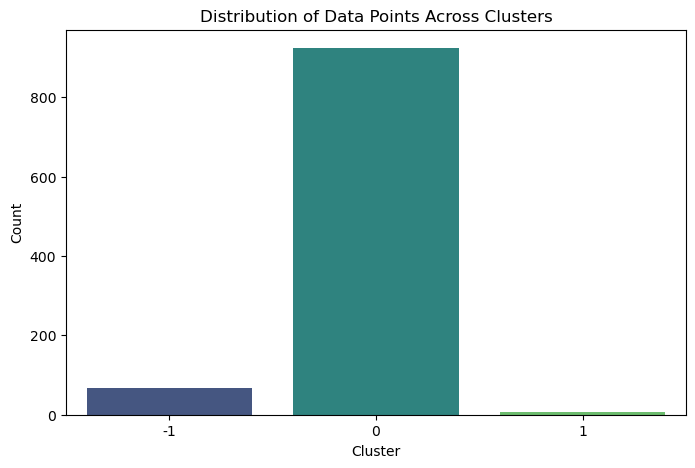

In [234]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df["DBSCAN_Cluster"], palette="viridis")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.title("Distribution of Data Points Across Clusters")
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_18956\1684080517.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["KMeans_Cluster"], y=df["Age_Numeric"], palette="Set2")


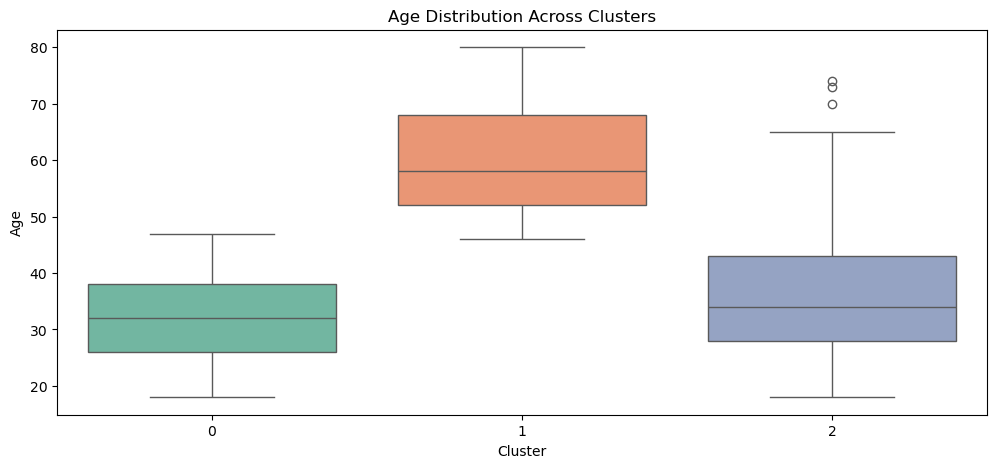

C:\Users\Asus\AppData\Local\Temp\ipykernel_18956\1684080517.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["KMeans_Cluster"], y=df["Income_Numeric"], palette="Set3")


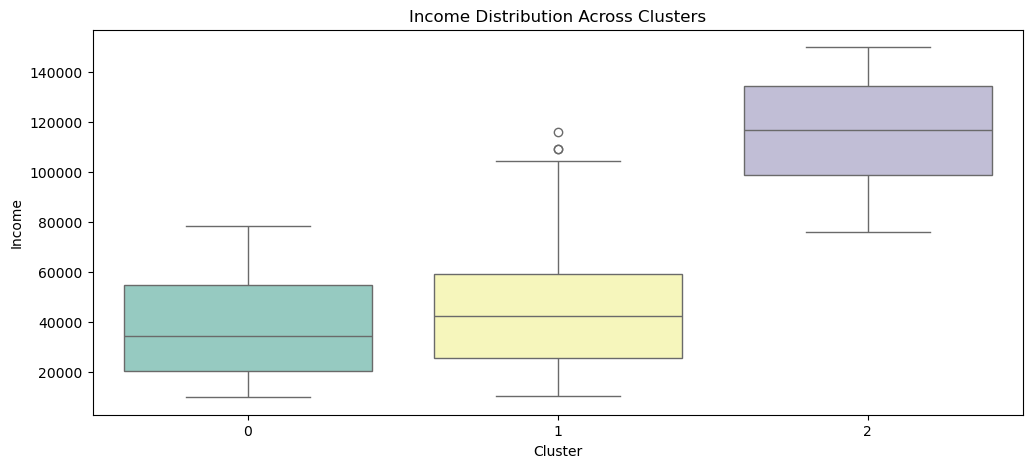

In [235]:
# box plots
plt.figure(figsize=(12, 5))
sns.boxplot(x=df["KMeans_Cluster"], y=df["Age_Numeric"], palette="Set2")
plt.xlabel("Cluster")
plt.ylabel("Age")
plt.title("Age Distribution Across Clusters")
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(x=df["KMeans_Cluster"], y=df["Income_Numeric"], palette="Set3")
plt.xlabel("Cluster")
plt.ylabel("Income")
plt.title("Income Distribution Across Clusters")
plt.show()


C:\Users\Asus\AppData\Local\Temp\ipykernel_18956\4216059965.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["HC_Cluster"], y=df["Age_Numeric"], palette="Set2")


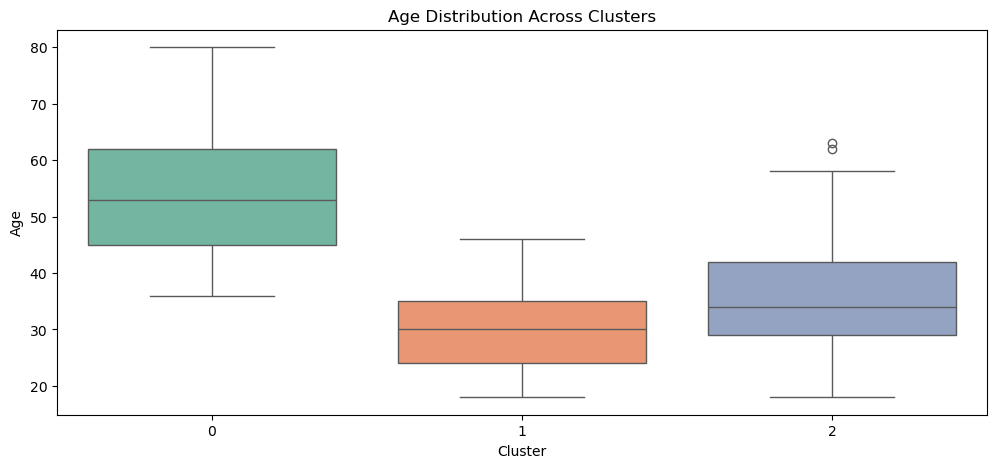

C:\Users\Asus\AppData\Local\Temp\ipykernel_18956\4216059965.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["HC_Cluster"], y=df["Income_Numeric"], palette="Set3")


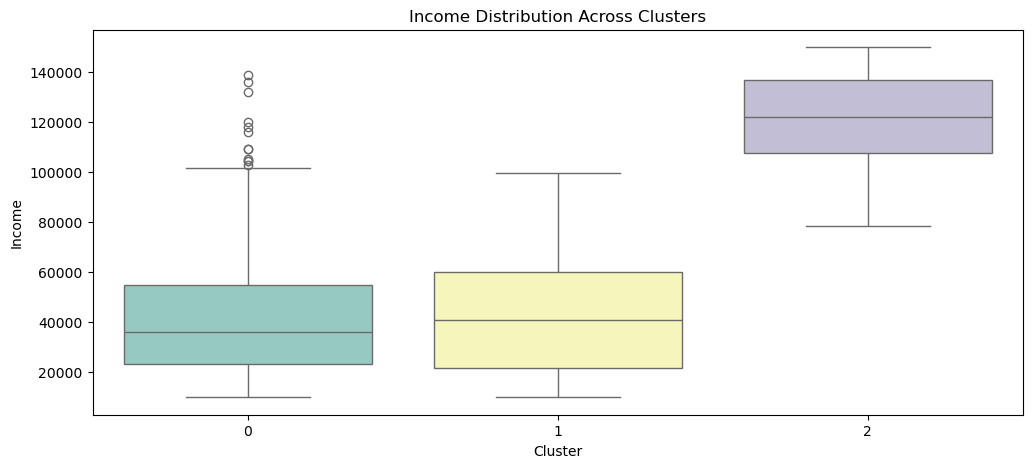

In [236]:
plt.figure(figsize=(12, 5))
sns.boxplot(x=df["HC_Cluster"], y=df["Age_Numeric"], palette="Set2")
plt.xlabel("Cluster")
plt.ylabel("Age")
plt.title("Age Distribution Across Clusters")
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(x=df["HC_Cluster"], y=df["Income_Numeric"], palette="Set3")
plt.xlabel("Cluster")
plt.ylabel("Income")
plt.title("Income Distribution Across Clusters")
plt.show()


C:\Users\Asus\AppData\Local\Temp\ipykernel_18956\416247293.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["DBSCAN_Cluster"], y=df["Age_Numeric"], palette="Set2")


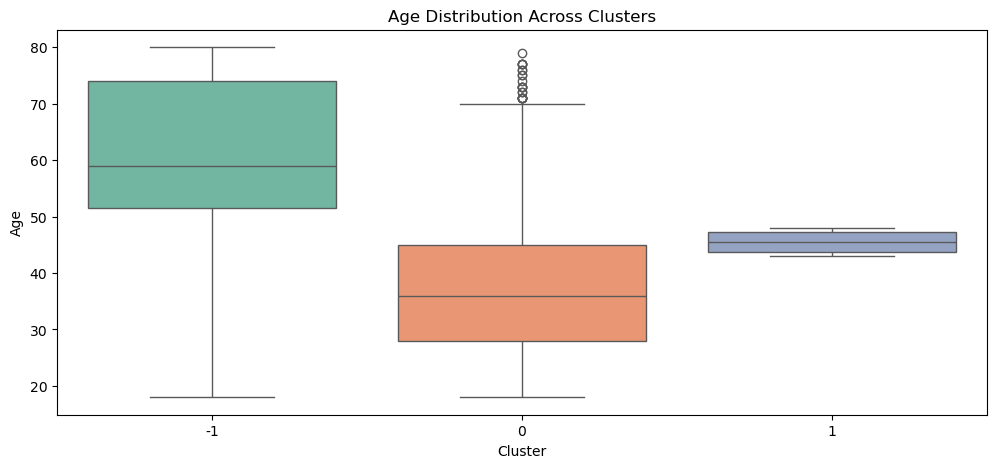

C:\Users\Asus\AppData\Local\Temp\ipykernel_18956\416247293.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["DBSCAN_Cluster"], y=df["Income_Numeric"], palette="Set3")


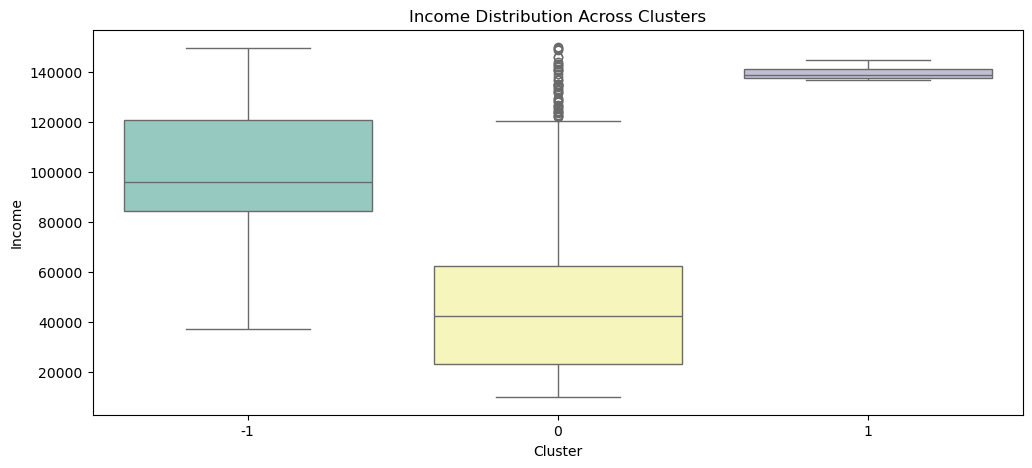

In [237]:
plt.figure(figsize=(12, 5))
sns.boxplot(x=df["DBSCAN_Cluster"], y=df["Age_Numeric"], palette="Set2")
plt.xlabel("Cluster")
plt.ylabel("Age")
plt.title("Age Distribution Across Clusters")
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(x=df["DBSCAN_Cluster"], y=df["Income_Numeric"], palette="Set3")
plt.xlabel("Cluster")
plt.ylabel("Income")
plt.title("Income Distribution Across Clusters")
plt.show()


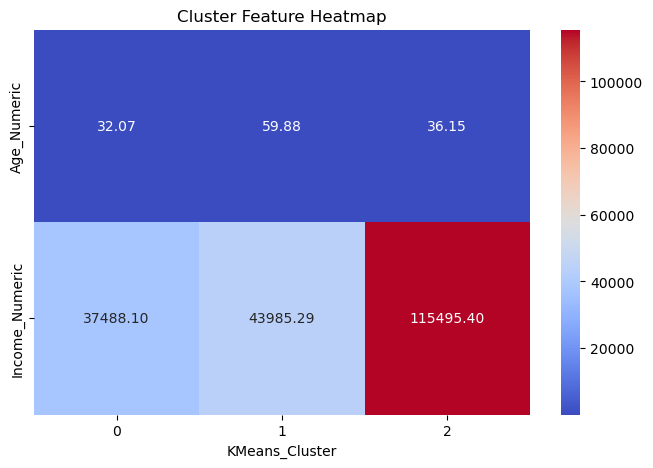

In [238]:
# heatmaps
numeric_cols = ["Age_Numeric", "Income_Numeric"]  # Add other relevant numeric features if needed
cluster_means = df.groupby("KMeans_Cluster")[numeric_cols].mean()

# Plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(cluster_means.T, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Cluster Feature Heatmap")
plt.show()

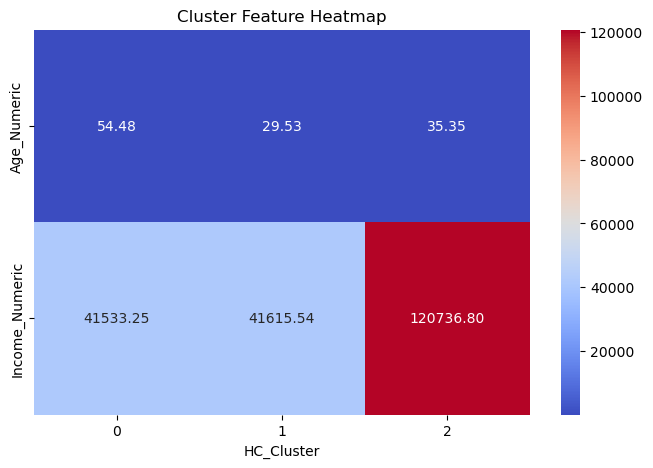

In [239]:
# Selecting only numeric columns for aggregation
numeric_cols = ["Age_Numeric", "Income_Numeric"]  # Add other relevant numeric features if needed
cluster_means = df.groupby("HC_Cluster")[numeric_cols].mean()

# Plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(cluster_means.T, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Cluster Feature Heatmap")
plt.show()

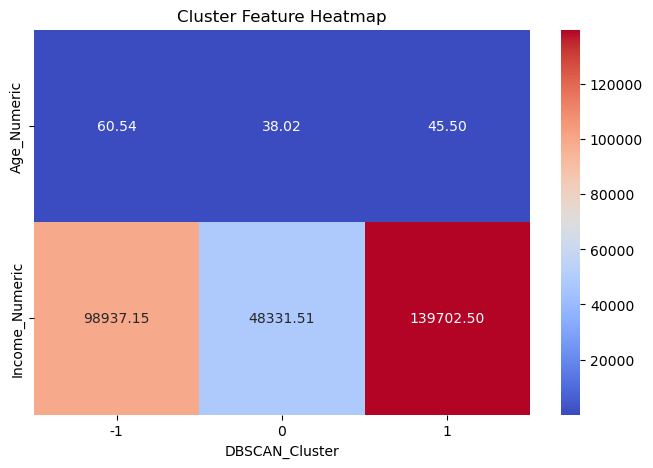

In [240]:
# Selecting only numeric columns for aggregation
numeric_cols = ["Age_Numeric", "Income_Numeric"]  # Add other relevant numeric features if needed
cluster_means = df.groupby("DBSCAN_Cluster")[numeric_cols].mean()

# Plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(cluster_means.T, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Cluster Feature Heatmap")
plt.show()

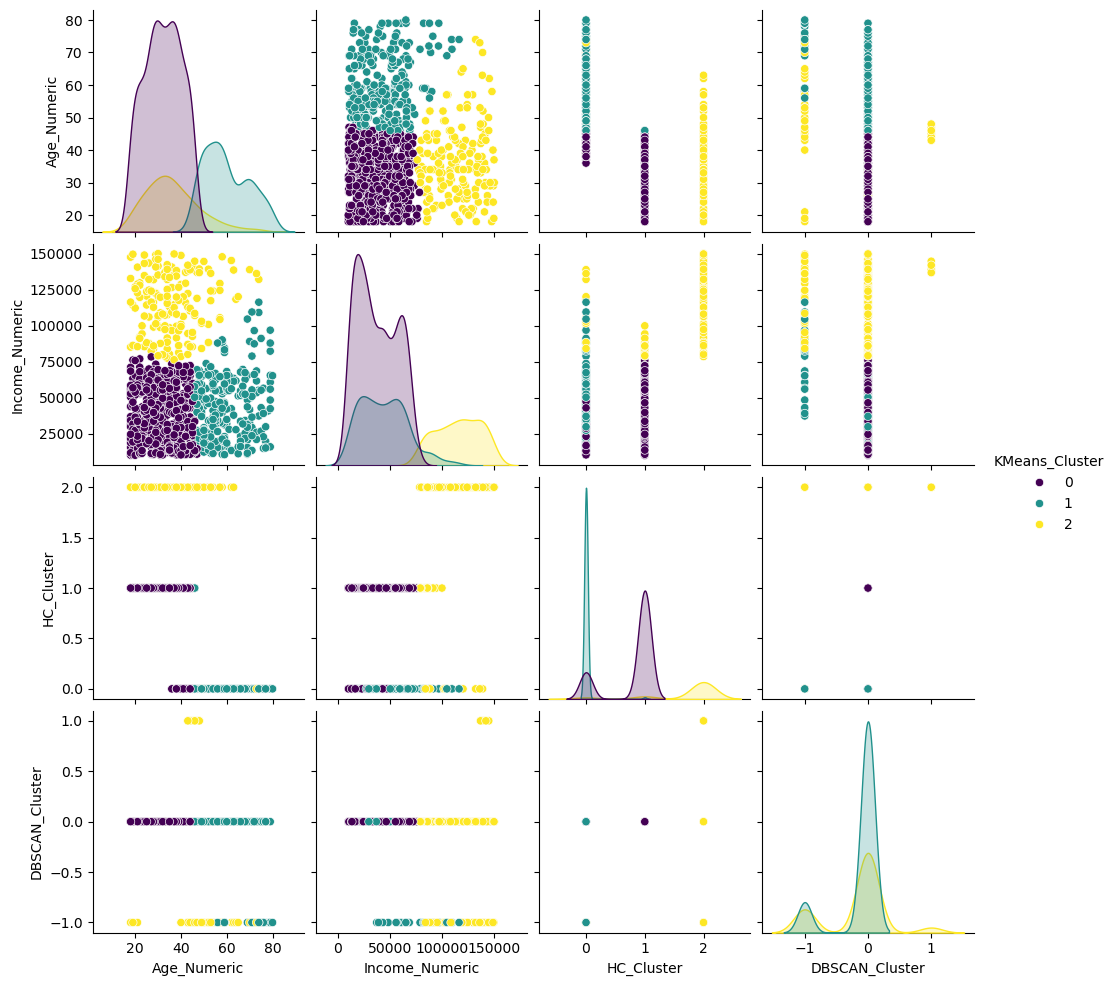

In [241]:
# pairplots
sns.pairplot(df, hue="KMeans_Cluster", palette="viridis")
plt.show()

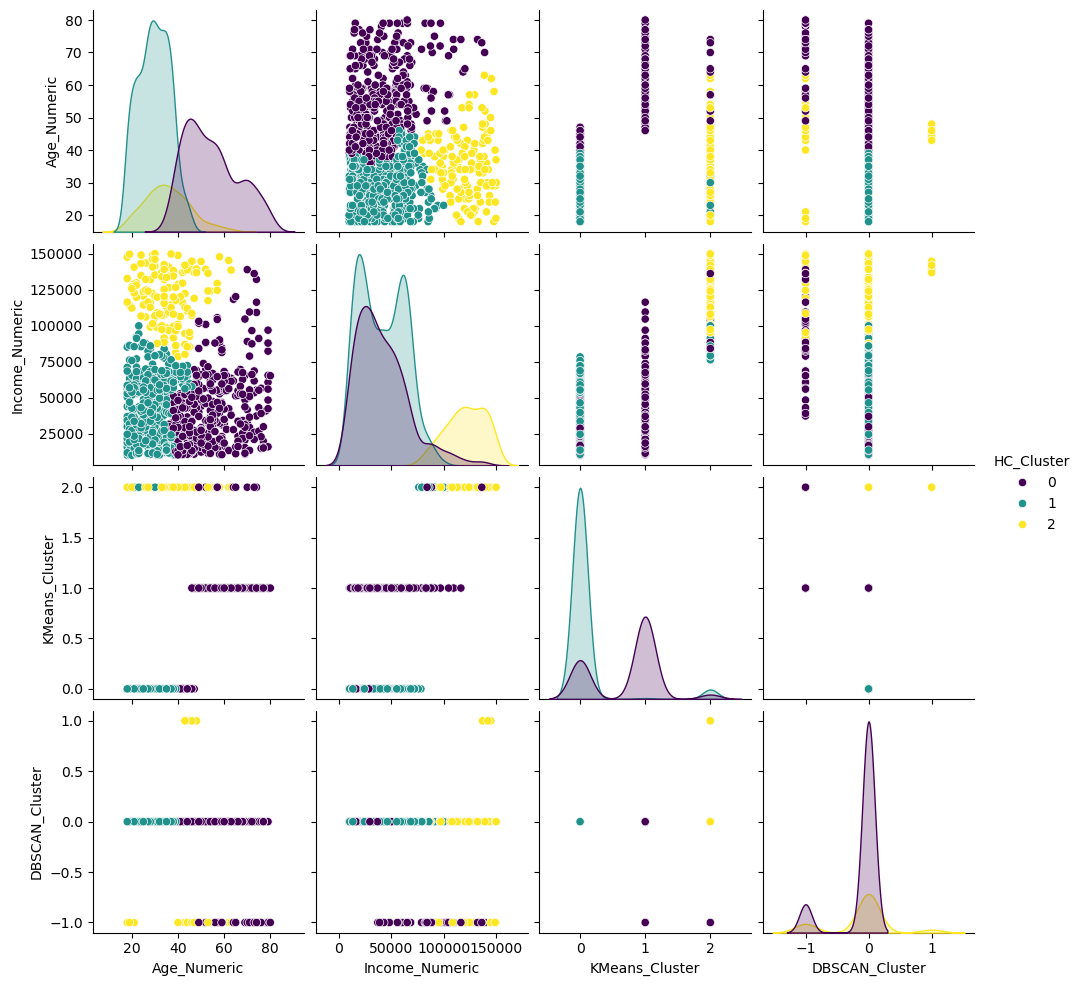

In [242]:
sns.pairplot(df, hue="HC_Cluster", palette="viridis")
plt.show()

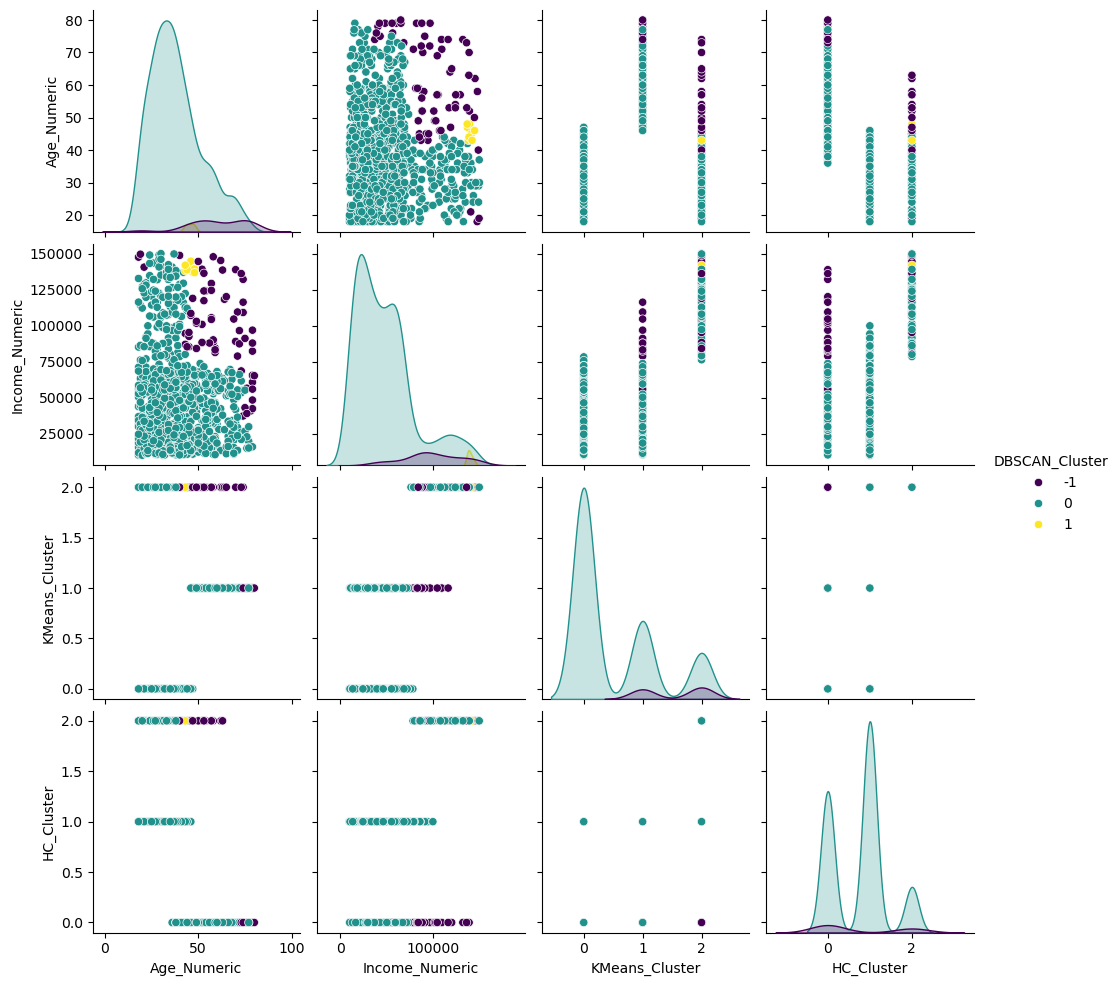

In [243]:
sns.pairplot(df, hue="DBSCAN_Cluster", palette="viridis")
plt.show()